In [106]:
import lightkurve
from lightkurve import search_targetpixelfile

In [107]:
tpf=search_targetpixelfile(300808472, sector=1).download()

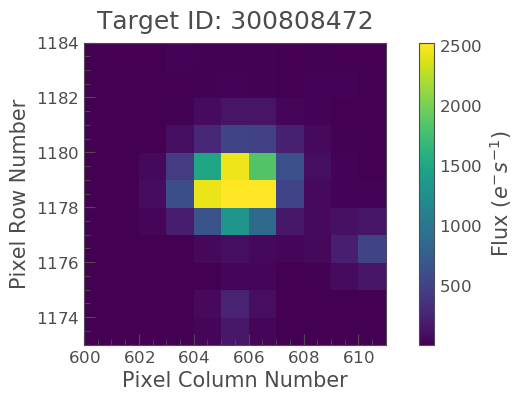

In [108]:
tpf.plot();

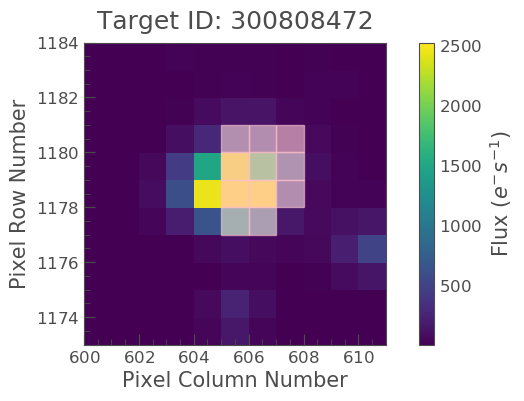

In [109]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

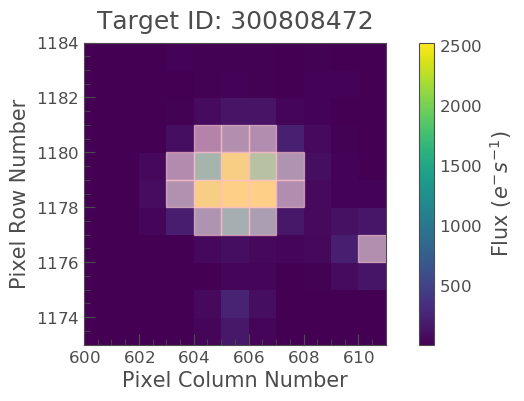

In [110]:
import numpy as np
# Create a median image of the source over time
median_image = np.nanmedian(tpf.flux, axis=0)
# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 86)
# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [111]:
lc=tpf.to_lightcurve(aperture_mask=aperture_mask)

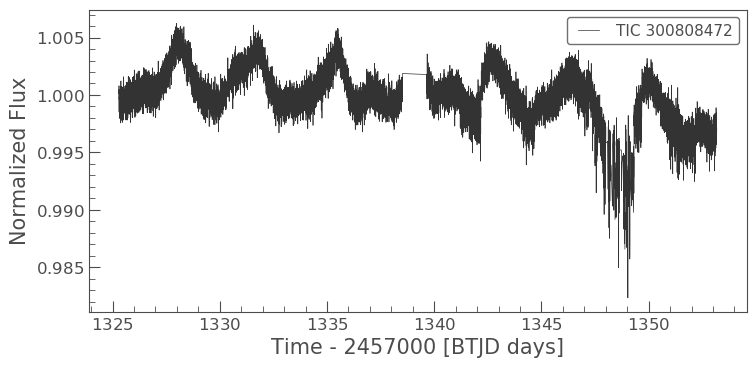

In [112]:
lc.plot();

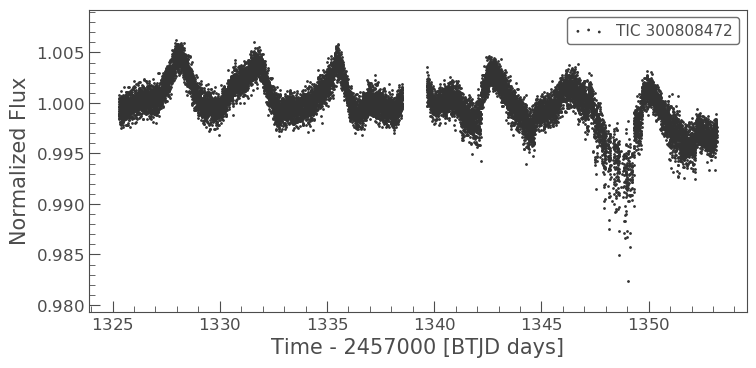

In [113]:
lc.remove_nans().scatter();

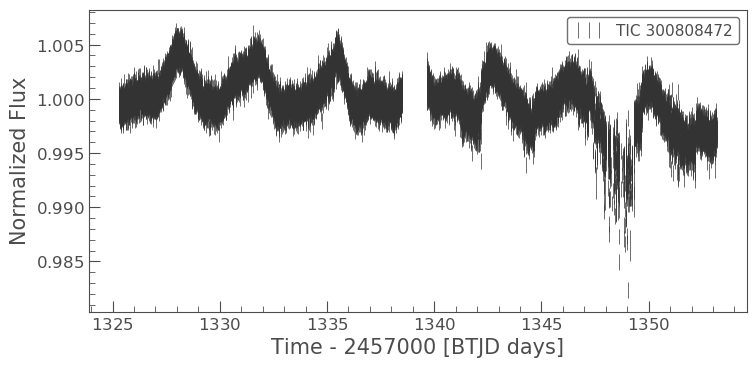

In [114]:
lc.remove_nans().errorbar();

In [115]:
pg = lc.to_periodogram(oversample_factor=10)

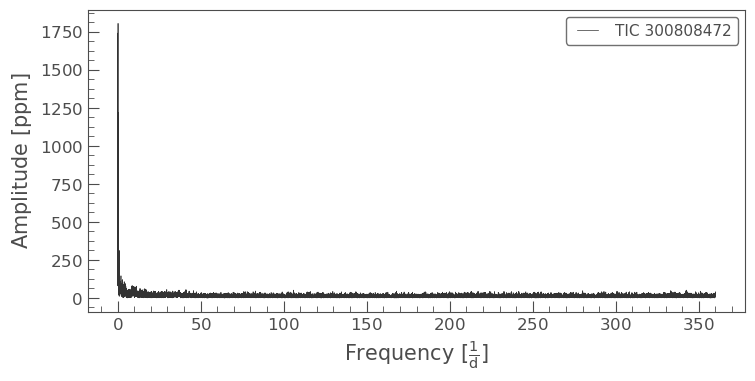

In [116]:
pg.plot();

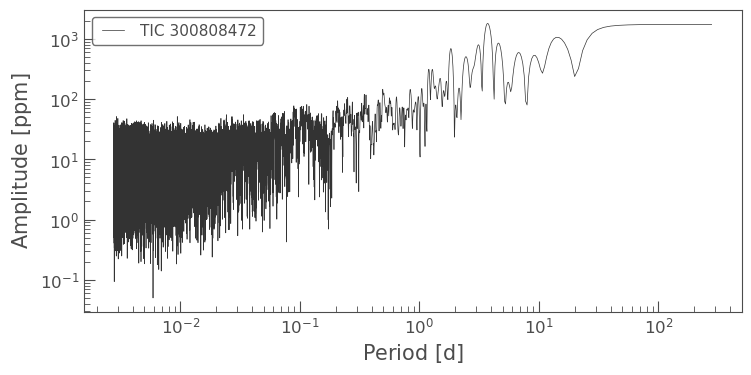

In [117]:
pg.plot(view='period', scale='log');

In [118]:
period = pg.period_at_max_power
print("Best period {}".format(period))

Best period 3.7173508813402805 d


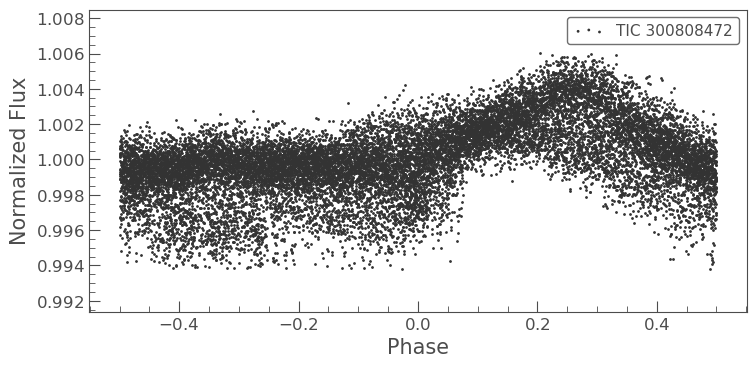

In [119]:
lc.remove_outliers(sigma=3).fold(period.value).scatter();

In [120]:
print(lc.time.shape)

(18104,)


In [121]:
oink = lc.remove_outliers(sigma=3).bin(binsize=1)

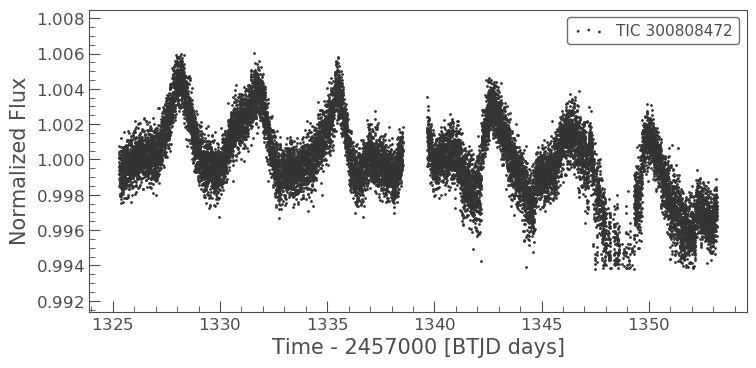

In [122]:
oink.remove_nans().scatter();

In [154]:
tpf1 = search_targetpixelfile(33831807, sector=1).download();

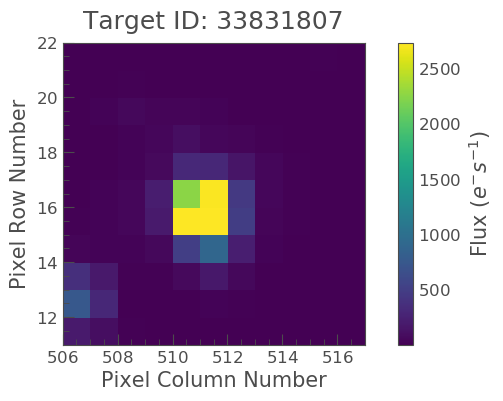

In [155]:
tpf1.plot();

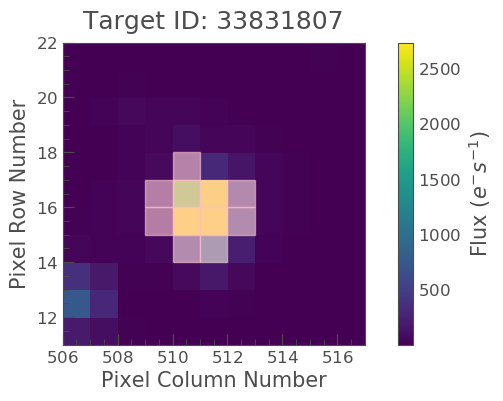

In [156]:
tpf1.plot(aperture_mask=tpf1.pipeline_mask);

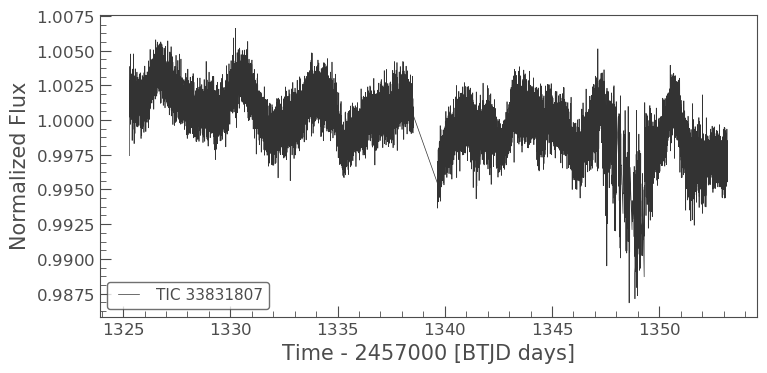

In [157]:
lc = tpf1.to_lightcurve();
lc.plot();

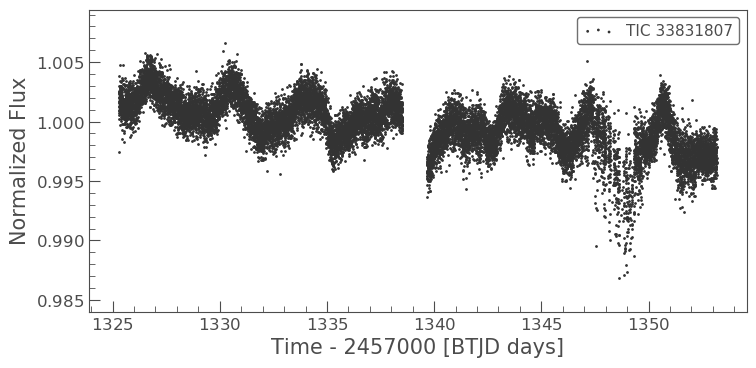

In [158]:
lc.scatter();

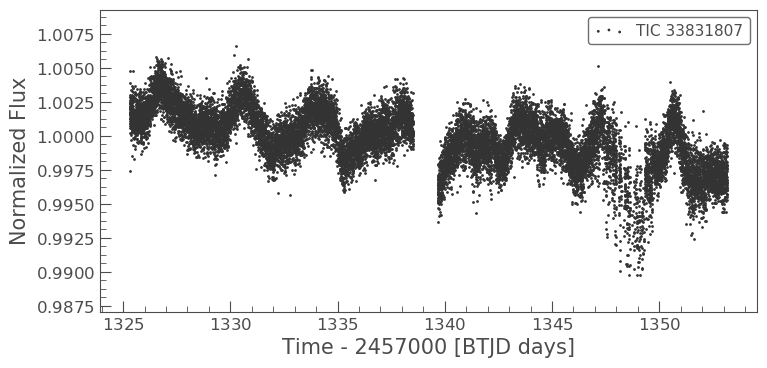

In [159]:
lc.remove_outliers(sigma=5).scatter();

In [160]:
print(lc.time.shape)

(18104,)


In [163]:
pg = lc.to_periodogram(oversample_factor=1)

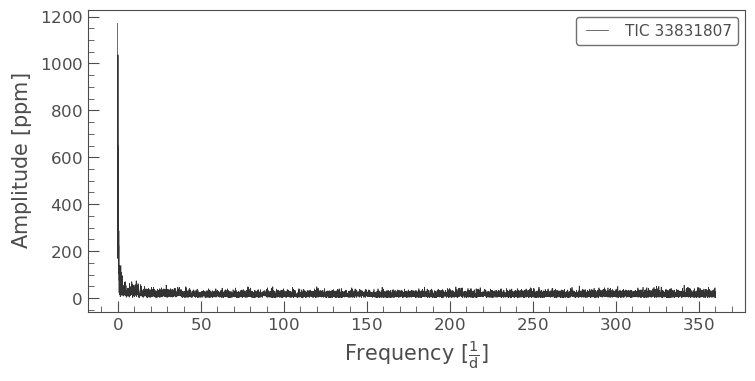

In [164]:
pg.plot();

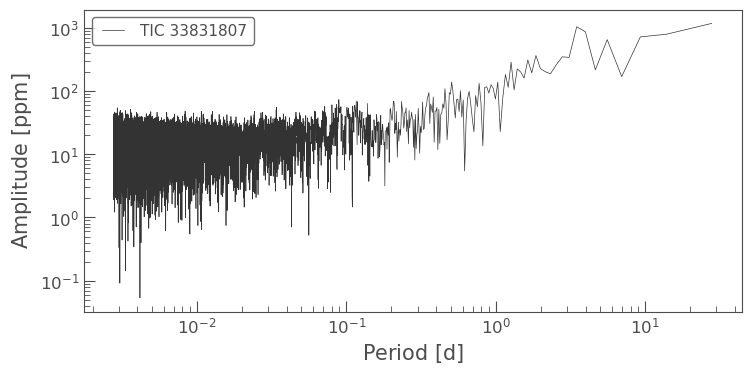

In [165]:
pg.plot(view='period', scale='log');

In [166]:
period = pg.period_at_max_power
print('Best Period : {}'.format(period))

Best Period : 27.88039954867554 d


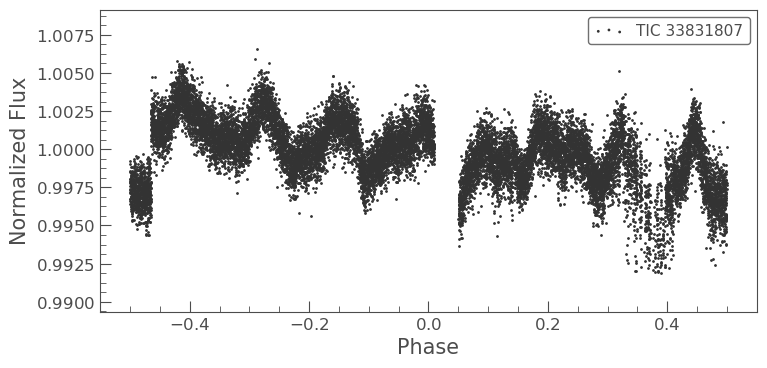

In [167]:
lc.remove_outliers(sigma=4).fold(period.value).scatter();

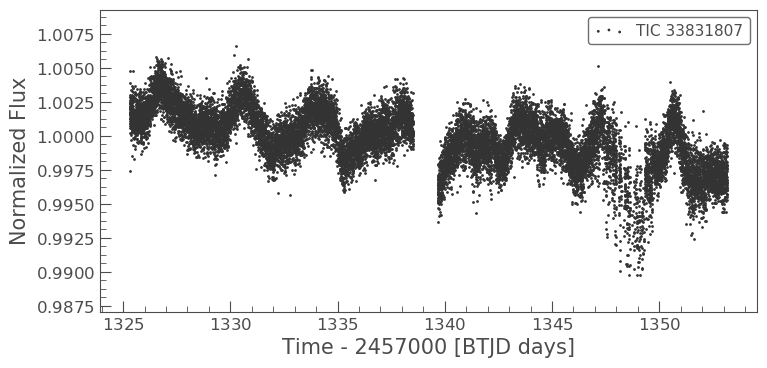

In [168]:
lc.remove_outliers(sigma=5).scatter();

In [169]:
lcf= lc.remove_outliers(sigma=3).fold(period.value).flatten(window_length=1001).bin(binsize=10)

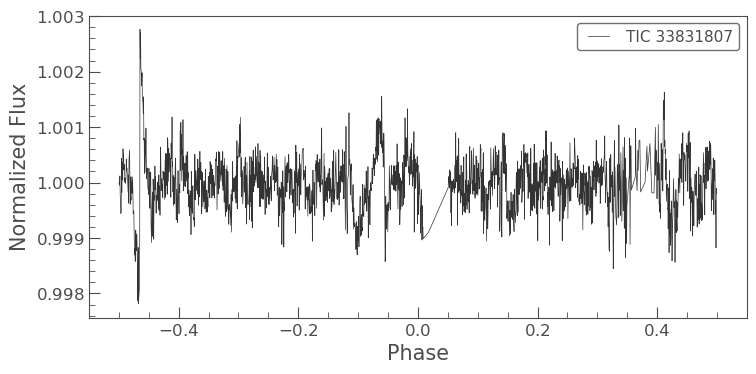

In [170]:
lcf.plot();

In [171]:
lcf.targetid

33831807

In [172]:
tpf2 = search_targetpixelfile(290027057, sector=1).download();

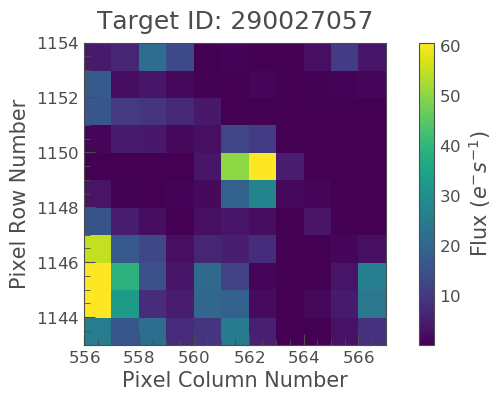

In [173]:
tpf2.plot();

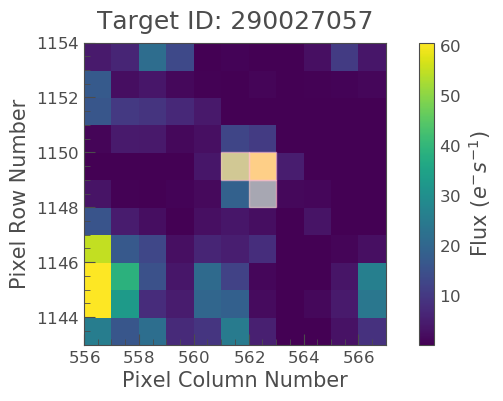

In [174]:
tpf2.plot(aperture_mask=tpf2.pipeline_mask);

In [175]:
lc2 = tpf2.to_lightcurve();

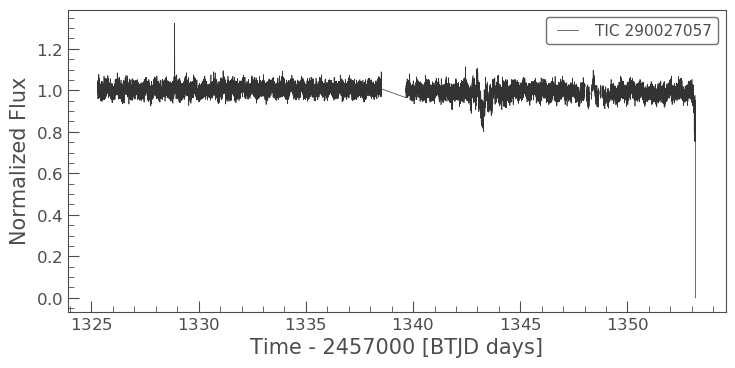

In [176]:
lc2.plot();

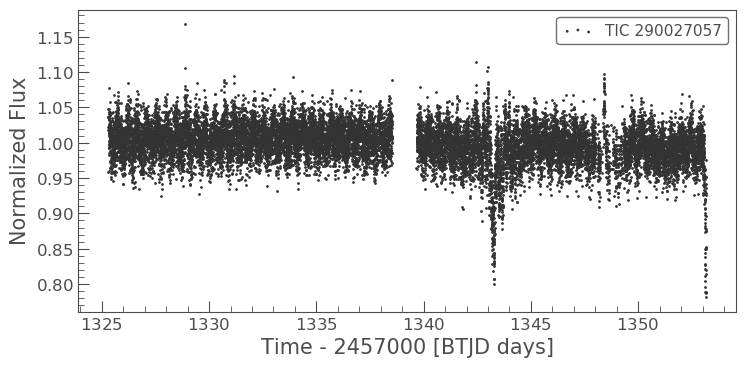

In [177]:
lc2.remove_nans().remove_outliers(sigma=8).scatter();

In [178]:
pg2=lc2.to_periodogram(oversample_factor=1)

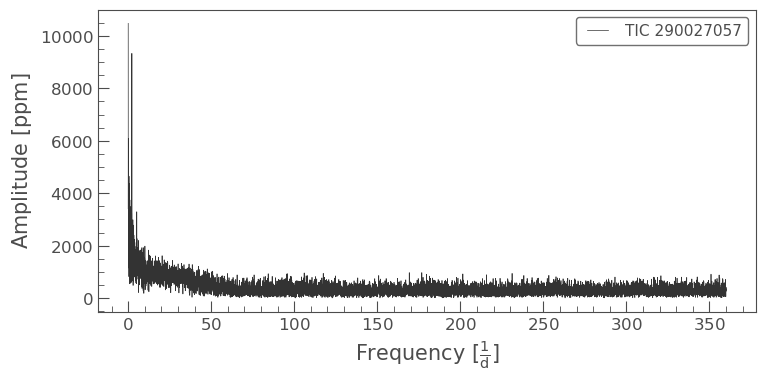

In [179]:
pg2.plot();

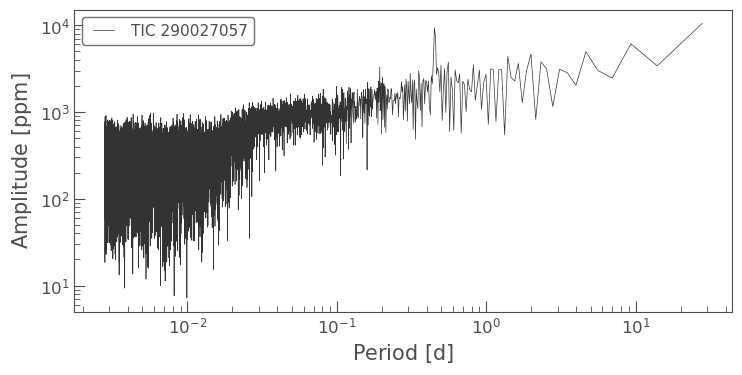

In [180]:
pg2.plot(view = 'period', scale='log');

In [181]:
period2=pg2.period_at_max_power
print("Best Period is {}".format(period2))

Best Period is 27.880354271846496 d


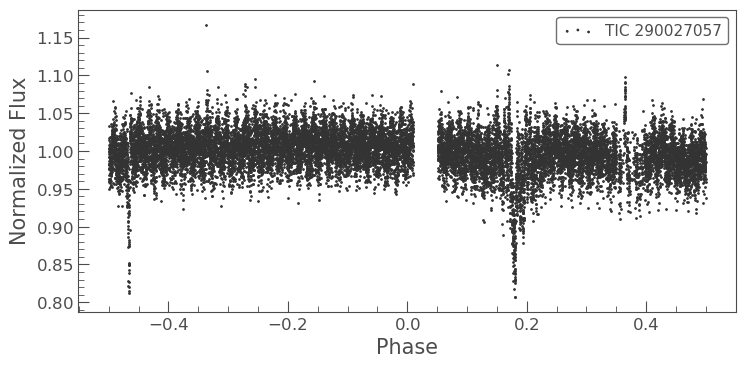

In [149]:
lc2.remove_nans().remove_outliers(sigma=7).fold(period2.value).bin(binsize=1).scatter();

In [184]:
tpf3=search_targetpixelfile(212357737, sector=1).download()
# Error: 
# No data found for target "212357737".
# /Users/ewarrick/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
# LightkurveWarning)

No data found for target "212357737".
/Users/ewarrick/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


In [185]:
tpf4=search_targetpixelfile(212357654, sector=1).download();

No data found for target "212357654".
/Users/ewarrick/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


In [1]:
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# For the purposes of this tutorial, we just know the MAST URL location of the file we want to examine.
fits_file = "https://archive.stsci.edu/missions/tess/ffi/s0001/2018/206/4-2/tess2018206192942-s0001-4-2-0120-s_ffic.fits"

In [3]:
fits.info(fits_file)

Filename: /Users/ewarrick/.astropy/cache/download/py3/a2387fb351da2473071afffde7bf341c
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  CAMERA.CCD 4.2 cal    1 ImageHDU       183   (2136, 2078)   float32   
  2  CAMERA.CCD 4.2 uncert    1 ImageHDU       183   (2136, 2078)   float32   


In [4]:
with fits.open(fits_file, mode = "readonly") as hdulist:
    wcs_info = WCS(hdulist[1].header)
    cal_image = hdulist[1].data
    header = hdulist[1].header

In [5]:
# Use the header to determine the mid-point of the exposure time for this FFI.
mid_time = (header['TSTOP'] + header['TSTART']) / 2

(2078, 2136)

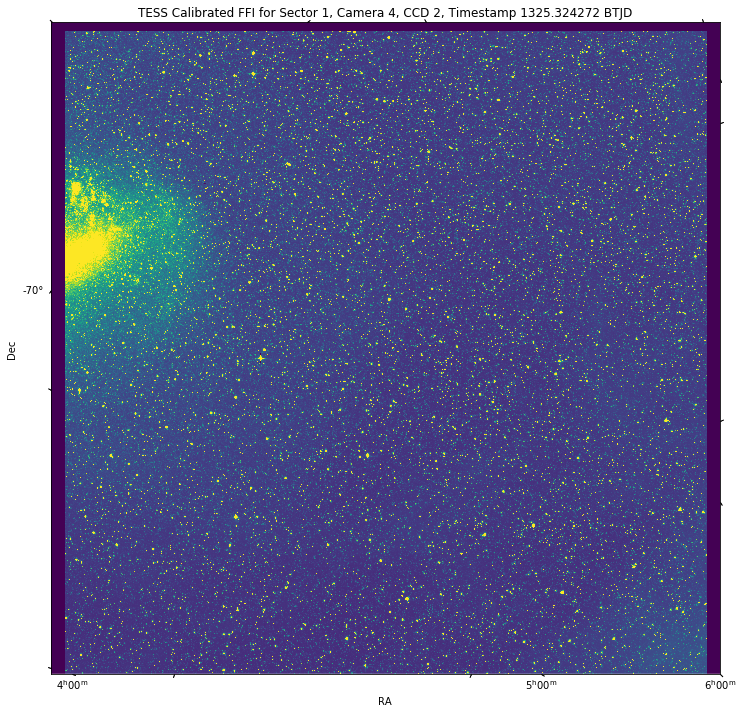

In [6]:
plt.figure(figsize = (12,12))

plt.subplot(111, projection = wcs_info)
plt.imshow(cal_image, vmin = np.percentile(cal_image,4),vmax = np.percentile(cal_image, 98),origin = "lower")
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title("TESS Calibrated FFI for Sector 1, Camera 4, CCD 2, Timestamp %f BTJD" % mid_time)

cal_image.shape

In [9]:
fits_file1="https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2019059172935-s0009-2-2-0139-s_ffic.fits"

In [10]:
fits.info(fits_file1)

Filename: /Users/ewarrick/.astropy/cache/download/py3/f7c4fa5a2af63bebd8e741f5c952f777
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  CAMERA.CCD 2.2 cal    1 ImageHDU       114   (2136, 2078)   float32   
  2  CAMERA.CCD 2.2 uncert    1 ImageHDU       114   (2136, 2078)   float32   


In [24]:
with fits.open(fits_file1, mode = "readonly") as hdulist:
    wcs_info = WCS(hdulist[1].header)
    cal_image = hdulist[1].data
    header = hdulist[1].header

In [25]:
# Use the header to determine the mid-point of the exposure time for this FFI.
mid_time = (header['TSTOP'] + header['TSTART']) / 2

(2078, 2136)

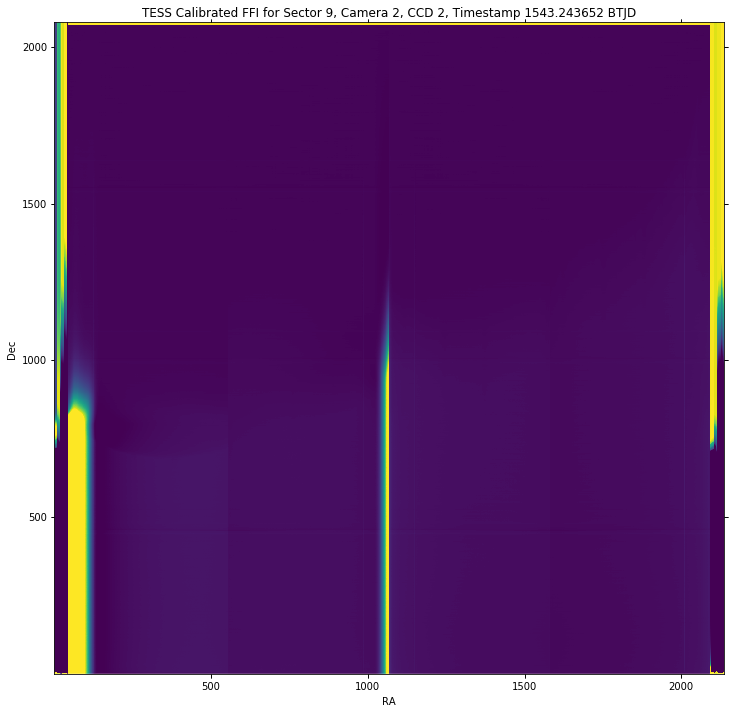

In [26]:
plt.figure(figsize = (12,12))

plt.subplot(111, projection = wcs_info)
plt.imshow(cal_image, vmin = np.percentile(cal_image,2),vmax = np.percentile(cal_image, 98),origin = "lower")
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title("TESS Calibrated FFI for Sector 9, Camera 2, CCD 2, Timestamp %f BTJD" % mid_time)

cal_image.shape